## Housing Affordability in Austin, Texas

It is common knowledge that Austin, Texas is growing. With that growth comes more expensive housing conditions. We wanted to understand how the city of Austin has changed over time, and if housing truly is as expensive.

We found that the number of cheaper homes has decreased over time, while the number of more expensive homes has increased. While income has also increased, the median household income is not enough to afford the median property value. In addition, income between genders and races is very dispersed. Finally, there has also been growth in the total population and various industries in Austin. However, with more people and jobs comes fewer homes. 

We have concluded that housing is becoming less affordable for Austinites, and that the median household income is not enough to cover the cost of a home. 

## Data Import
- Import dependencies

In [1]:
# import data and dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# read in data into dataframes 
employment_by_industry = pd.read_csv("data/employment_by_industry_cleaned.csv")
property_value = pd.read_csv("data/property_value_cleaned.csv")
demographics = pd.read_csv("data/demographics_cleaned.csv")
wage_by_gender = pd.read_csv("data/wage_by_gender_cleaned.csv")
wage_by_race = pd.read_csv("data/wage_by_race_cleaned.csv")
austin_income = pd.read_csv("data/austin_median_household_income.csv")

## How have property values evolved over time?

Over the last 3 years, the median household price has been in the 300k-399k range. The number of homes in this bucket have increased over time (27% in 2016 and 4% in 2017). Based on the chart, it appears that then number of homes available below this bucket decrease, and the number of homes above this bucket increase each year. 

In [3]:
property_value.head()

,Unnamed: 0,ID Value Bucket,Value Bucket,Year,Property Value by Bucket,Property Value by Bucket Moe,Geography,share
0,0,0,"Less Than $10,000",2017,1000376,16112.0,United States,0.013045
1,1,25,"$2,000,000 or More",2017,2224,832.0,"Austin, TX",0.013137
2,2,2,"$15,000 to $19,999",2017,484108,10315.0,United States,0.006313
3,3,3,"$20,000 to $24,999",2017,537939,9802.0,United States,0.007015
4,4,4,"$25,000 to $29,999",2017,495363,10768.0,United States,0.006460


In [43]:
# Data Analysis -- Property Values 
# get only Austin data
atx_property = property_value.loc[property_value["Geography"] == "Austin, TX"]

#exclude extremely small data and sort by values 
atx_property = atx_property.loc[atx_property["ID Value Bucket"] >= 13]
atx_property = atx_property.sort_values("ID Value Bucket")

#get data specific to years 
year1 = atx_property.loc[atx_property["Year"] == 2015]
year2 = atx_property.loc[atx_property["Year"] == 2016]
year3 = atx_property.loc[atx_property["Year"] == 2017]

# calculate basic information about 2015 for summary table 
max_2015 = year1["Property Value by Bucket"].max()
prop_2015 = year1.loc[year1["Property Value by Bucket"] == max_2015]
prop_2015 = prop_2015.iloc[0]["Value Bucket"]

# calculate basic information about 2016 for summary table 
max_2016 = year2["Property Value by Bucket"].max()
prop_2016 = year2.loc[year2["Property Value by Bucket"] == max_2016]
prop_2016 = prop_2016.iloc[0]["Value Bucket"]

# calculate basic information about 2017 for summary table 
max_2017 = year3["Property Value by Bucket"].max()
prop_2017 = year3.loc[year3["Property Value by Bucket"] == max_2017]
prop_2017 = prop_2017.iloc[0]["Value Bucket"]

summary = pd.DataFrame({"Median Property Value":
                        {"2015":prop_2015,
                          "2016":prop_2016,
                          "2017":prop_2017},
                        "# Of Properties in Bucket":
                        {"2015":max_2015,
                                "2016":max_2016,
                                "2017":max_2017},
                        "% Change in # of Properties":
                        {"2015":"n/a",
                         "2016":round((((max_2016-max_2015))/max_2015)*100,2),
                         "2017":round((((max_2017-max_2016))/max_2016)*100,2)}
                       })
summary

,Median Property Value,# Of Properties in Bucket,% Change in # of Properties
2015,"$300,000 to $399,999",25327,n/a
2016,"$300,000 to $399,999",32072,26.63
2017,"$300,000 to $399,999",33446,4.28


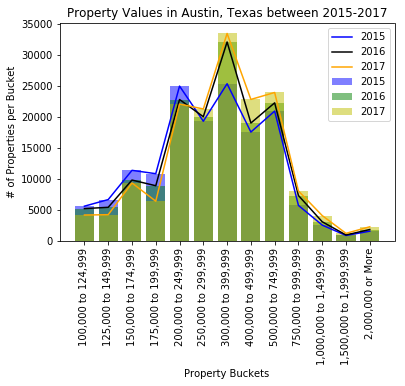

In [5]:
#identify x/y values and error for chart
x1 = year1["ID Value Bucket"]
y1 = year1["Property Value by Bucket"]
x2 = year2["ID Value Bucket"]
y2 = year2["Property Value by Bucket"]
x3 = year3["ID Value Bucket"]
y3 = year3["Property Value by Bucket"]

# graph values on a bar chart 
fig, ax = plt.subplots()
ax.bar(x1,y1,alpha=0.5, label="2015", color='b')
ax.bar(x2,y2, alpha=0.5, label="2016", color='g')
ax.bar(x3,y3,alpha=0.5,label ="2017",color='y')

# add labels and title 
ax.set_xlabel("Property Buckets")
ax.set_ylabel("# of Properties per Bucket")
ax.set_title("Property Values in Austin, Texas between 2015-2017")
plt.xticks(x1, rotation = 'vertical')
ax.set_xticklabels(('100,000 to 124,999',
                    '125,000 to 149,999',
                    '150,000 to 174,999',
                    '175,000 to 199,999',
                    '200,000 to 249,999',
                    '250,000 to 299,999',
                    '300,000 to 399,999',
                    '400,000 to 499,999',
                    '500,000 to 749,999',
                    '750,000 to 999,999',
                    '1,000,000 to 1,499,999',
                    '1,500,000 to 1,999,999',
                    '2,000,000 or More'))
ax.legend()

# plot data and save graph 
plt.plot(x1,y1, label="2015", c='b')
plt.plot(x2,y2, label = "2016",c='black')
plt.plot(x3,y3,label="2017",c='orange')
plt.legend()
plt.savefig('images/property_values.png',bbox_inches="tight")

## How has population changed over time? 

The population of Austin has increased from 845,088 in 2015 to 902,684 in 2017. It appears that whites are the largest group of the entire population. Blacks tend to stay level, though there was an increase afte 2016. Hispanics have an interesting gap between males and females (there always tends to be more males than females) which is not seen in other groups. 

In [22]:
demographics.head()

,Unnamed: 0,Year,Age,White Male,White Female,Black Male,Black Female,Hispanic Male,Hispanic Female
0,0,2017,< 05,15336,14590,3231,3159,19631,18786
1,1,2017,05-09,14209,13366,3066,2965,19100,18416
2,2,2017,10-14,13381,12563,3158,3087,18115,17388
3,3,2017,15-19,13211,12983,3576,3263,17636,16457
4,4,2017,20-24,17553,17309,3970,3921,17325,17012


In [45]:
# Data Analysis
# select only ages that can work in the city 
working_pop = demographics.sort_values("Age")
working_pop = working_pop.loc[(working_pop["Age"] != "< 05") & 
                           (working_pop["Age"] != "05-09") & 
                           (working_pop["Age"] != "10-14")]

# identify total number of people per year 
demo_2015 = working_pop.loc[working_pop["Year"] == 2015]
demo_sum2015 = (demo_2015[["White Male","Black Male","Hispanic Male", "White Female",
                        "Black Female","Hispanic Female"]].sum()).sum()
demo_2016 = working_pop.loc[working_pop["Year"] == 2016]
demo_sum2016 = (demo_2016[["White Male","Black Male","Hispanic Male", "White Female",
                        "Black Female","Hispanic Female"]].sum()).sum()
demo_2017 = working_pop.loc[working_pop["Year"] == 2017]
demo_sum2017 = (demo_2017[["White Male","Black Male","Hispanic Male", "White Female",
                        "Black Female","Hispanic Female"]].sum()).sum()

# add data to summary chart
summary = pd.DataFrame({"Median Property Value":
                                {"2015":prop_2015,
                                 "2016":prop_2016,
                                 "2017":prop_2017},
                        "# Of Properties in Bucket":
                                {"2015":max_2015,
                                "2016":max_2016,
                                "2017":max_2017},
                        "% Change in # of Properties":
                                {"2015":"n/a",
                                 "2016":round((((max_2016-max_2015))/max_2015)*100,2),
                                 "2017":round((((max_2017-max_2016))/max_2016)*100,2)},
                       "Total Population of Austin":
                                {"2015":demo_sum2015,
                                 "2016":demo_sum2016,
                                 "2017":demo_sum2017},
                        "% Change in Total Population":
                                {"2015":"n/a",
                                "2016":round((((demo_sum2016 - demo_sum2015))/demo_sum2015)*100,2),
                                "2017":round((((demo_sum2017 - demo_sum2016))/demo_sum2016)*100,2)},
                       })
summary

,Median Property Value,# Of Properties in Bucket,% Change in # of Properties,Total Population of Austin,% Change in Total Population
2015,"$300,000 to $399,999",25327,n/a,845088,n/a
2016,"$300,000 to $399,999",32072,26.63,860755,1.85
2017,"$300,000 to $399,999",33446,4.28,902684,4.87


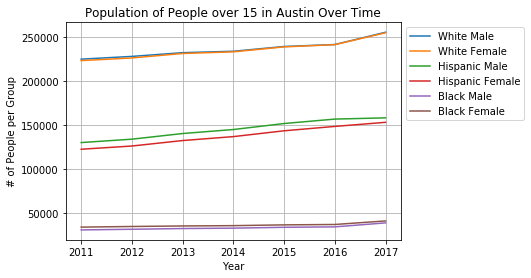

In [7]:
# create chart which shows the change in population over time 
year_grouped = working_pop.groupby(["Year"])
year_total = year_grouped[["White Male","White Female","Hispanic Male",
                         "Hispanic Female", "Black Male",
                         "Black Female"]].sum()
year_total.plot(grid=True)
plt.ylabel("# of People per Group")
plt.title("Population of People over 15 in Austin Over Time")
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('images/total_working_demographics.png',bbox_inches="tight")

## Have wages changed in the same proportion as property values? 

It does not appear that income has changed in the same proportion as property values. As previously discussed, the median house price each years is between $300k-399k. 

The median household income has increased over time (4% in 2015 and 2% in 2016), however, the maximum household price the range this income can afford is in the $200k-$249k range. 

The population is increasing, while the number of houses in this range is decreasing (8% in 2016 and 3% in 2017). 

In [46]:
# Data Analysis 
# calculate income information per year for summary table 
income_2015 = (austin_income.loc[(austin_income["Date"] == 2015)])["Austin"]
income_2015 = income_2015.iloc[0]
income_2016 = (austin_income.loc[(austin_income["Date"] == 2016)])["Austin"]
income_2016 = income_2016.iloc[0]
income_2017 = (austin_income.loc[(austin_income["Date"] == 2017)])["Austin"]
income_2017 = income_2017.iloc[0]

# calculate # of properties that are affordable 
afford_2015 = (year1.loc[year1["Value Bucket"] == "$200,000 to $249,999"])
afford_2015 = afford_2015.iloc[0]["Property Value by Bucket"]
afford_2016 = (year2.loc[year2["Value Bucket"] == "$200,000 to $249,999"])
afford_2016 = afford_2016.iloc[0]["Property Value by Bucket"]
afford_2017 = (year3.loc[year3["Value Bucket"] == "$200,000 to $249,999"])
afford_2017 = afford_2017.iloc[0]["Property Value by Bucket"]

# create a summary dataframe to show changes in data above 
summary = pd.DataFrame({
    "Median Property Value":{"2015":prop_2015,
                          "2016":prop_2016,
                          "2017":prop_2017},
    "# Of Properties in Bucket":{"2015":max_2015,
                                "2016":max_2016,
                                "2017":max_2017},
    "% Change in # of Properties":{"2015":"n/a",
                                  "2016":round((((max_2016-max_2015))/max_2015)*100,2),
                                  "2017":round((((max_2017-max_2016))/max_2016)*100,2)},
    "Total Population of Austin":{"2015":demo_sum2015,
                                 "2016":demo_sum2016,
                                 "2017":demo_sum2017},
    "% Change in Total Population":{"2015":"n/a",
                                   "2016":round((((demo_sum2016 - demo_sum2015))/demo_sum2015)*100,2),
                                   "2017":round((((demo_sum2017 - demo_sum2016))/demo_sum2016)*100,2)},
    "Median Household Income in Austin":{"2015":income_2015,
                                        "2016":income_2016,
                                        "2017":income_2017},
    "% Change in Median Household Income":{"2015":"n/a",
                                          "2016":round((((income_2016 - income_2015))/income_2015)*100,2),
                                          "2017":round((((income_2017 - income_2016))/income_2016)*100,2)},
    "Max Affordable Property Value by Income":{"2015":income_2015*3,
                                              "2016":income_2016*3,
                                              "2017":income_2017*3},
    "# of Affordable Properties":{"2015":afford_2015,
                                 "2016":afford_2016,
                                 "2017":afford_2017},
    "% Change in Affordable Properties": {"2015":"n/a",
                                         "2016":round((((afford_2016 - afford_2015))/afford_2015)*100,2),
                                         "2017":round((((afford_2017 - afford_2016))/afford_2017)*100,2)}
})
summary

,Median Property Value,# Of Properties in Bucket,% Change in # of Properties,Total Population of Austin,% Change in Total Population,Median Household Income in Austin,% Change in Median Household Income,Max Affordable Property Value by Income,# of Affordable Properties,% Change in Affordable Properties
2015,"$300,000 to $399,999",25327,n/a,845088,n/a,69525.0,n/a,208575.0,24947,n/a
2016,"$300,000 to $399,999",32072,26.63,860755,1.85,72527.0,4.32,217581.0,22780,-8.69
2017,"$300,000 to $399,999",33446,4.28,902684,4.87,73800.0,1.76,221400.0,22042,-3.35


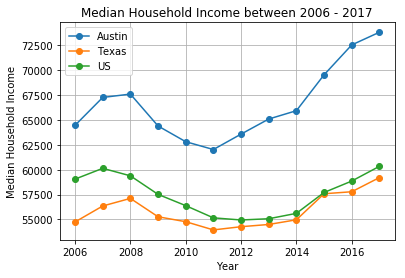

In [8]:
# identify x and y for different income values
x_income = austin_income["Date"]
y_income = austin_income["Austin"]
texas_income = austin_income["Texas"]
us_income = austin_income["US"]

# plot values and set x/y axis and title
plt.plot(x_income,y_income, marker='o',label="Austin")
plt.plot(x_income,texas_income,marker='o',label="Texas")
plt.plot(x_income,us_income,marker='o',label="US")
plt.xlabel("Year")
plt.ylabel("Median Household Income")
plt.title("Median Household Income between 2006 - 2017")
plt.legend()
plt.grid()
plt.savefig('images/household_income.png',bbox_inches="tight")

## What’s the difference in wages between genders? 

Each year, it appears that males make 25% more than females in Austin. After 2016, both groups experiences a wage decrease, but the decrease was larger for females. 

Males tend to be in the truck driver or miscellaneous manager jobs, while females tend to be in the teacher occupation. 

Males tend to make more than females across all categories except for teachers. It is most interesting that even though there are many more females as cashiers, males are making more than them. This is surprising given this is generally a low-skill job. 

In [47]:
wage_by_gender.head()

,Unnamed: 0,Gender,Year,Detailed Occupation,Average Wage,Average Wage Appx MOE,Total Population,Total Population MOE Appx,Geography
0,0,Male,2017,Retail salespersons,47846.352518,3804.663122,105135,7920.181697,Texas
1,1,Female,2017,Retail salespersons,30004.730677,2799.423796,67718,6368.011331,Texas
2,2,Female,2017,Driver/sales workers & truck drivers,35748.793893,4667.189878,16768,3176.610042,Texas
3,3,Female,2017,Miscellaneous managers,76689.726074,4527.145064,110373,8113.010681,Texas
4,4,Female,2017,Elementary & middle school teachers,47260.808781,923.589424,260916,12381.986848,Texas


In [10]:
#Avg wage male
male = wage_by_gender[(wage_by_gender['Gender']=='Male')]
wage_avg_male = pd.DataFrame(male.groupby('Year')['Average Wage'].mean())

#Avg wage female
female = wage_by_gender[(wage_by_gender['Gender']=='Female')]
wage_avg_female = pd.DataFrame(female.groupby('Year')['Average Wage'].mean())

In [11]:
#Create Dataframe with wages for male and female and the difference
wages_df = pd.merge(wage_avg_male, wage_avg_female, how="left", on=["Year"])
avg_wages = wages_df.rename(columns={'Average Wage_x': 'Avg Wage Male',
                                     'Average Wage_y': 'Avg Wage Female'})
avg_wages['Avg Wage Difference'] = avg_wages['Avg Wage Male'] - avg_wages['Avg Wage Female']
avg_wages['Percent Difference'] = (avg_wages['Avg Wage Female'] - avg_wages['Avg Wage Male'])/avg_wages['Avg Wage Male']

In [12]:
# clean up formatting
avg_wages.style.format({'Avg Wage Male': '${:,.2f}'.format,
                       'Avg Wage Female': '${:,.2f}'.format,
                       'Avg Wage Difference': '${:,.2f}'.format,
                       'Percent Difference': '{:,.2%}'.format})

,Avg Wage Male,Avg Wage Female,Avg Wage Difference,Percent Difference
Year,,,,
2014,"$54,033.66","$40,420.49","$13,613.17",-25.19%
2015,"$56,106.25","$41,170.07","$14,936.18",-26.62%
2016,"$57,480.99","$43,416.67","$14,064.32",-24.47%
2017,"$57,292.96","$42,121.16","$15,171.79",-26.48%


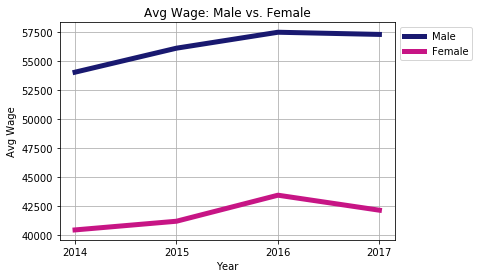

In [13]:
#Plot avg wages 
plt.plot(avg_wages['Avg Wage Male'], color='midnightblue', alpha=1, linewidth=5, label="Male")
plt.plot(avg_wages['Avg Wage Female'], color='mediumvioletred', alpha=1, linewidth=5, label='Female')
plt.legend(bbox_to_anchor=(1,1))
plt.title("Avg Wage: Male vs. Female")
plt.xlabel('Year')
plt.ylabel('Avg Wage')
plt.xticks(np.linspace(2014, 2017, 4, endpoint=True)) 
plt.grid()
plt.savefig('images/avg_wage_male_female.png',bbox_inches="tight")
plt.show()

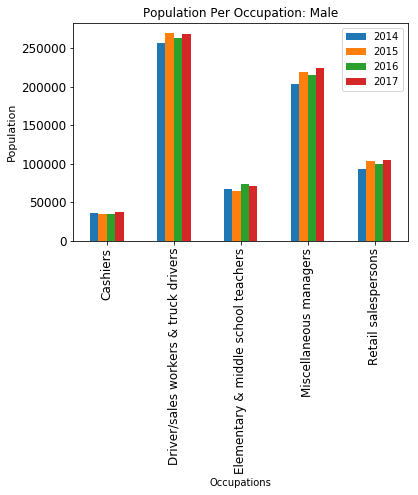

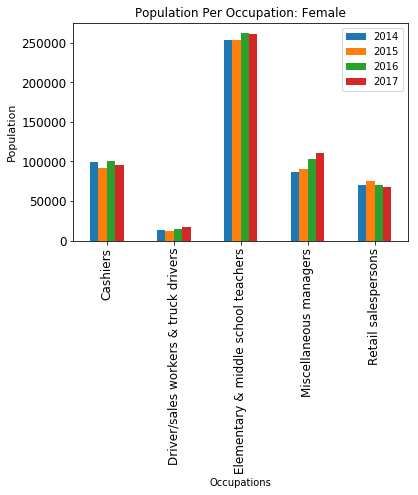

In [14]:
#plot population per occupation over time, male
male_graph = male[['Total Population','Year','Detailed Occupation']]
male_grp = male_graph.groupby(by=['Detailed Occupation','Year']).sum().unstack()
male_grp.plot(kind="bar", title="Population Per Occupation: Male", fontsize=12)
plt.ylabel('Population', fontsize=11)
plt.xlabel('Occupations')
plt.legend(['2014', '2015', '2016', '2017'])
plt.savefig('images/male_occupations.png',bbox_inches='tight')
plt.show()

#plot population per occupation over time: female
female_graph = female[['Total Population','Year','Detailed Occupation']]
female_grp = female_graph.groupby(by=['Detailed Occupation','Year']).sum().unstack()
female_grp.plot(kind="bar", title="Population Per Occupation: Female", fontsize=12)
plt.ylabel('Population', fontsize=11)
plt.xlabel('Occupations')
plt.legend(['2014', '2015', '2016', '2017'])
plt.savefig('images/female_occupations.png', bbox_inches = "tight")
plt.show()

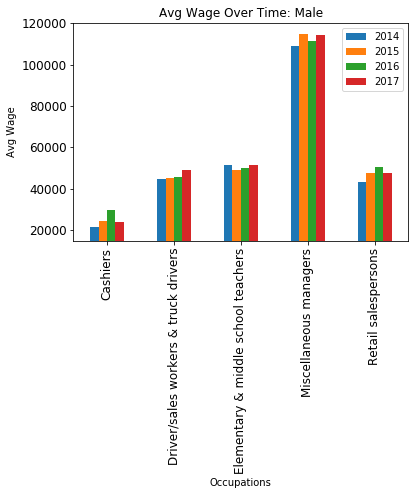

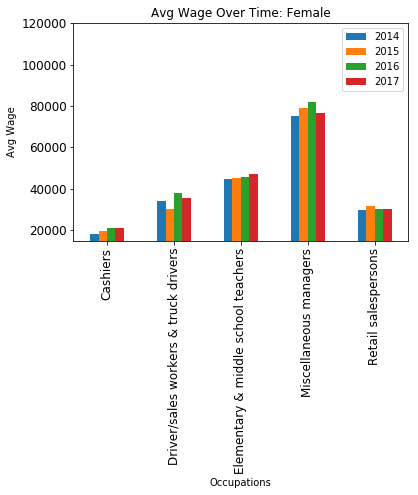

In [15]:
# plot avg wage over time for males
male_graph = male[['Average Wage','Year','Detailed Occupation']]
male_grp = male_graph.groupby(by=['Detailed Occupation','Year']).sum().unstack()
male_grp.plot(kind="bar", title="Avg Wage Over Time: Male", fontsize=12)
plt.ylabel('Avg Wage')
plt.xlabel('Occupations')
plt.ylim(15000,120000)
plt.legend(['2014', '2015', '2016', '2017'])
plt.savefig('images/avg_male_wage.png',bbox_inches="tight")
plt.show()

# plot avg wage over time for females
female_graph = female[['Average Wage','Year','Detailed Occupation']]
female_grp = female_graph.groupby(by=['Detailed Occupation','Year']).sum().unstack()
female_grp.plot(kind="bar", title="Avg Wage Over Time: Female", fontsize=12)
plt.ylabel('Avg Wage')
plt.xlabel('Occupations')
plt.ylim(15000,120000)
plt.legend(['2014', '2015', '2016', '2017'])
plt.savefig('images/avg_female_wage.png',bbox_inches="tight")
plt.show()

## What’s the difference in wages between races? 

Wages generally increase for each race over time. However, whites make more than most other races. 

Asians tend to be managers. Blacks tend to be cashiers or truck drivers. Whites tend to be school teachers. Mixed races tend to be cashiers. These occupations may explain a portion of wage differences between races. For examples, whites and asians are primarily in jobs that require more skills.

In [48]:
wage_by_race.head()

,Unnamed: 0,Race,Year,Detailed Occupation,Average Wage,Average Wage Appx MOE,Total Population,Total Population MOE Appx,Geography
0,0,Black,2017,Miscellaneous managers,69171.764829,6422.316804,30548,4285.814751,Texas
1,1,Two or More Races,2017,Retail salespersons,21091.920452,8820.370169,8146,2215.159608,Texas
2,2,Two or More Races,2017,Driver/sales workers & truck drivers,39007.477377,9268.471191,4133,1578.103411,Texas
3,3,Two or More Races,2017,Miscellaneous managers,86430.587985,22866.284236,7524,2128.962714,Texas
4,4,Two or More Races,2017,Elementary & middle school teachers,45618.450450,5322.337122,6882,2036.161331,Texas


In [16]:
# group data and find the mean
grouped_wages = wage_by_race.groupby(["Year", "Race"])["Average Wage"].mean()
grouped_wages = grouped_wages.reset_index()

#exclude data for smaller races 
grouped_wages = grouped_wages[grouped_wages.Race!="American Indian"]
grouped_wages = grouped_wages[grouped_wages.Race!="American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races"]                              
grouped_wages

,Year,Race,Average Wage
2,2014,Asian,46483.530857
3,2014,Black,38244.485023
4,2014,Other,34568.969800
5,2014,Two or More Races,38409.608372
6,2014,White,44529.759288
9,2015,Asian,41385.822057
10,2015,Black,36036.587613
11,2015,Other,36335.887563
12,2015,Two or More Races,40057.134766
13,2015,White,46670.188367


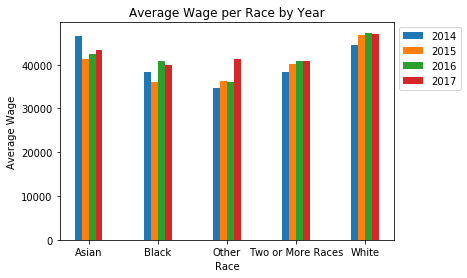

In [17]:
# plot wages by race 
x = np.array([0,1,2,3,4])
for year in grouped_wages['Year'].unique():
    plt.bar(x, grouped_wages[grouped_wages['Year'] == year]['Average Wage'], width=0.1, label=year)
    x = x + 0.1
plt.xticks(np.array([0,1,2,3,4]) + 0.15, grouped_wages['Race'].unique()) 
plt.xlabel("Race")
plt.ylabel("Average Wage")
plt.title("Average Wage per Race by Year")
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('images/wage_by_race.png',bbox_inches="tight")
plt.show()

In [51]:
# group data by race
asian = wage_by_race.loc[wage_by_race["Race"] == "Asian"]
white = wage_by_race.loc[wage_by_race["Race"] == "White"]
black = wage_by_race.loc[wage_by_race["Race"] == "Black"]
other = wage_by_race.loc[wage_by_race["Race"] == "Other"]
two = wage_by_race.loc[wage_by_race["Race"] == "Two or More Races"]


asian = asian[["Year","Detailed Occupation", "Total Population"]]
asian =asian.sort_values("Detailed Occupation")
asian=asian.set_index(["Detailed Occupation","Year"])
white = white[["Year","Detailed Occupation", "Total Population"]]
white=white.sort_values("Detailed Occupation")
white=white.set_index(["Detailed Occupation","Year"])
black = black[["Year","Detailed Occupation", "Total Population"]]
black=black.set_index(["Detailed Occupation","Year"])
black=black.sort_values("Detailed Occupation")
other = other[["Year","Detailed Occupation", "Total Population"]]
other=other.set_index(["Detailed Occupation","Year"])
other=other.sort_values("Detailed Occupation")
two = two[["Year","Detailed Occupation", "Total Population"]]
two=two.set_index(["Detailed Occupation","Year"])
two=two.sort_values("Detailed Occupation")

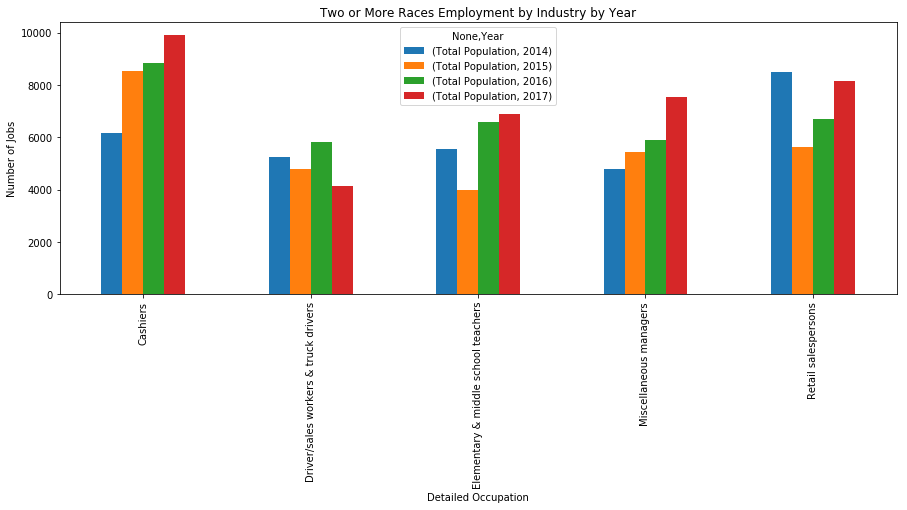

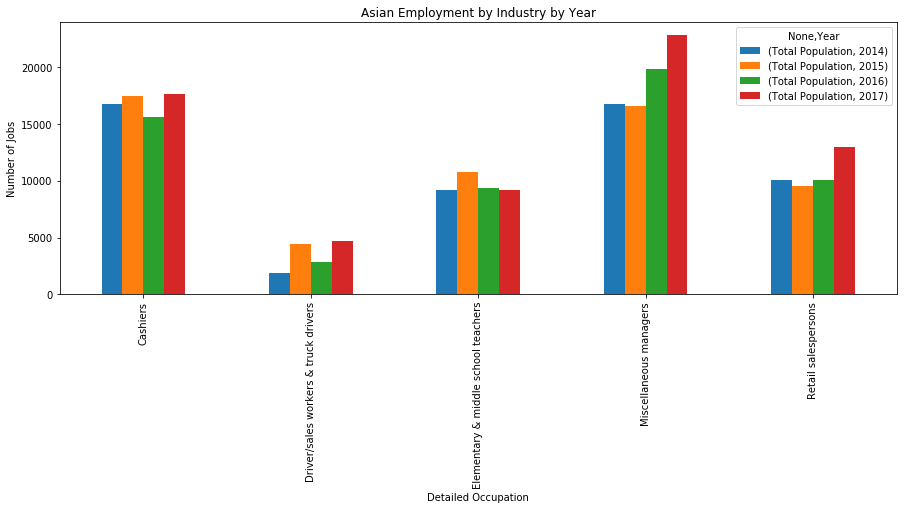

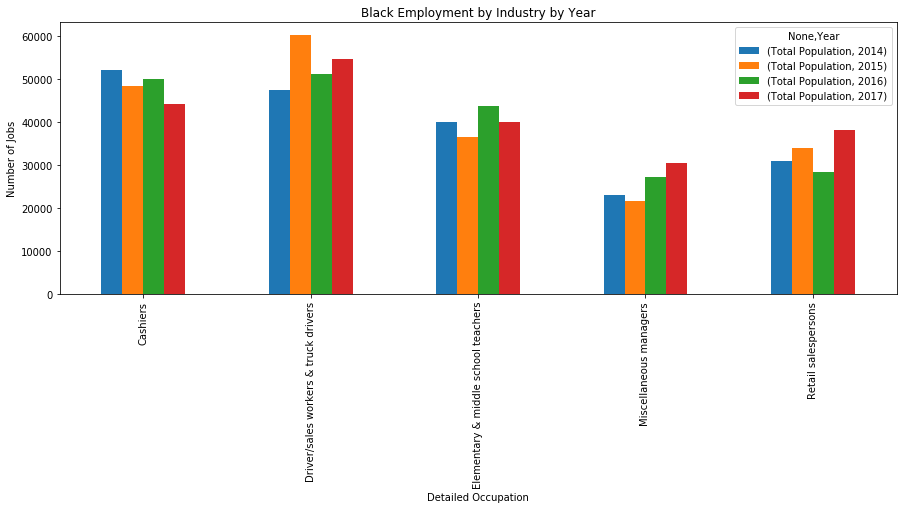

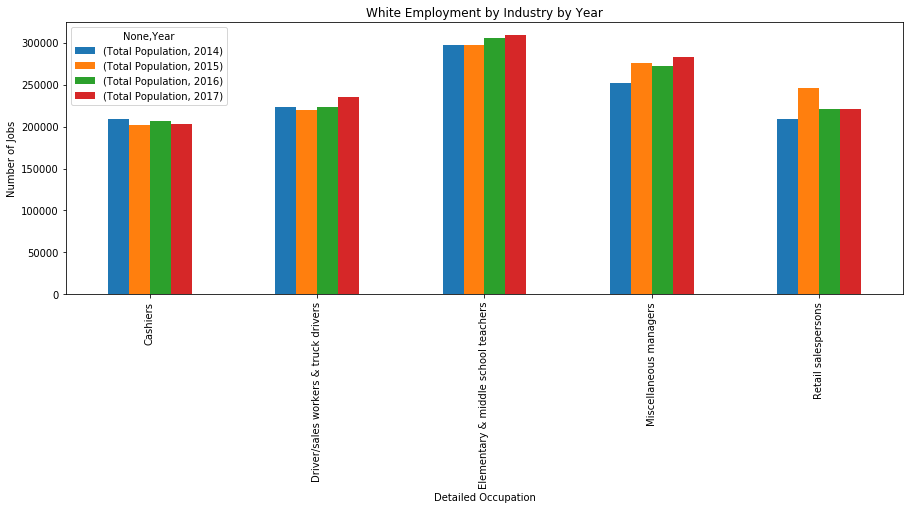

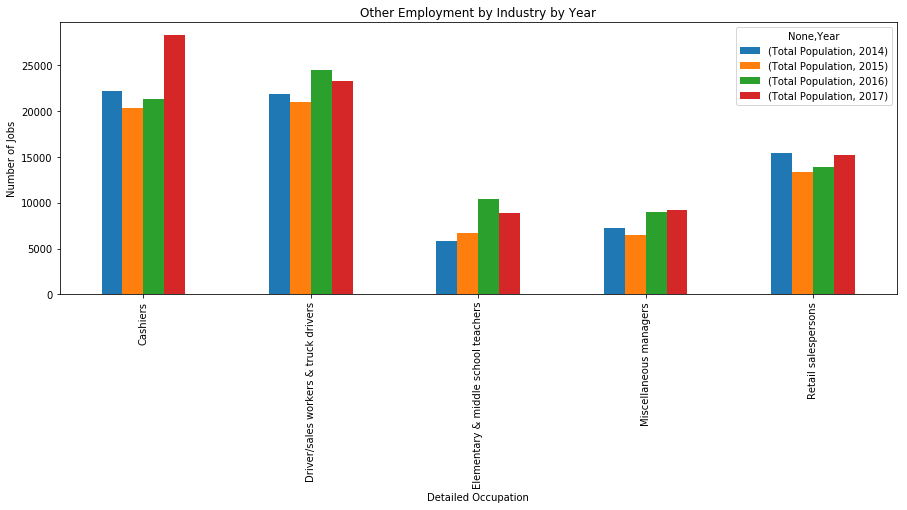

In [57]:
# plot data for two or more races by industry
two.unstack().plot.bar(legend=True, figsize = (15,5), title = "Two or More Races Employment by Industry by Year")
plt.ylabel("Number of Jobs")
plt.savefig('images/two_races_occupations.png')

# plot data for asian by industry
asian.unstack().plot.bar(legend=True, figsize = (15,5), title = "Asian Employment by Industry by Year")
plt.ylabel("Number of Jobs")
plt.savefig('images/asian_occupations.png')

# plot data for black by industry
black.unstack().plot.bar(legend=True, figsize = (15,5), title = "Black Employment by Industry by Year")
plt.ylabel("Number of Jobs")
plt.savefig('images/black_occupations.png')

# plot data for white by industry
white.unstack().plot.bar(legend=True, figsize = (15,5), title = "White Employment by Industry by Year")
plt.ylabel("Number of Jobs")
plt.savefig('images/white_occupations.png')

# plot data for other by industry
other.unstack().plot.bar(legend=True, figsize = (15,5), title = "Other Employment by Industry by Year")
plt.ylabel("Number of Jobs")
plt.savefig('images/other_occupations.png')

## Have the industries in Austin changed over time?

Generally, industries have grown in Austin (1.6% from 2013 to 2017). The exception is retail, which has decreased -8% between 2013 and 2017. 

The top growing industries from 2013 to 2017 include transporation & warehousing (57%), real estate (37%), and professional/scientific/technology services (25%). 

Further investigation is needed to understand if these industries provide the wages necessary to make enough money to purchase a home in Austin. 

In [58]:
employment_by_industry.head()

,Unnamed: 0,Industry,ID Group,Group,ID Industry,ID Year,Year,ID State,State,Workforce by Industry and Gender,Workforce by Industry and Gender Moe,Geography,ID Geography,Slug Geography
0,0,Educational Services,9,"Educational Services, & Health Care & Social A...",14,2017,2017,04000US48,Texas,58591,4083.898750,"Austin, TX",16000US4805000,austin-tx
1,1,Accommodation & Food Services,10,"Arts, Entertainment, & Recreation, & Accommoda...",17,2017,2017,04000US48,Texas,48958,3997.982741,"Austin, TX",16000US4805000,austin-tx
2,2,Construction,1,Construction (Group),2,2017,2017,04000US48,Texas,41460,5012.614188,"Austin, TX",16000US4805000,austin-tx
3,3,"Arts, Entertainment, & Recreation",10,"Arts, Entertainment, & Recreation, & Accommoda...",16,2017,2017,04000US48,Texas,13123,2272.642955,"Austin, TX",16000US4805000,austin-tx
4,4,Manufacturing,2,Manufacturing (Group),3,2017,2017,04000US48,Texas,41586,4264.172604,"Austin, TX",16000US4805000,austin-tx


In [18]:
# group data by year 
y2013 = employment_by_industry.loc[employment_by_industry["Year"] == 2013]
y2014 = employment_by_industry.loc[employment_by_industry["Year"] == 2014]
y2015 = employment_by_industry.loc[employment_by_industry["Year"] == 2015]
y2016 = employment_by_industry.loc[employment_by_industry["Year"] == 2016]
y2017 = employment_by_industry.loc[employment_by_industry["Year"] == 2017]

# drop utilities, fishing& hunting, mining, management of companies, whole
y2013 = y2013[["Industry","Workforce by Industry and Gender"]]
y2013=y2013.set_index("Industry")
y2014 = y2014[["Industry","Workforce by Industry and Gender"]]
y2014=y2014.set_index("Industry")
y2015 = y2015[["Industry","Workforce by Industry and Gender"]]
y2015=y2015.set_index("Industry")
y2016 = y2016[["Industry","Workforce by Industry and Gender"]]
y2016=y2016.set_index("Industry")
y2017 = y2017[["Industry","Workforce by Industry and Gender"]]
y2017=y2017.set_index("Industry")

# create dataframe based on cleanup
industry_groupings =pd.DataFrame({"2013":y2013['Workforce by Industry and Gender']
                      ,"2014":y2014['Workforce by Industry and Gender']
                      ,"2015":y2015['Workforce by Industry and Gender']                            
                      ,"2016":y2016['Workforce by Industry and Gender']                            
                      ,"2017":y2017['Workforce by Industry and Gender']})
industry_groupings

,2013,2014,2015,2016,2017
Accommodation & Food Services,45900,45211,48195,42693,48958
"Arts, Entertainment, & Recreation",11015,10772,13090,14465,13123
Construction,35756,33731,39977,42818,41460
Educational Services,52255,56249,51390,53372,58591
Health Care & Social Assistance,44222,49362,52104,52837,52161
Information,15588,15138,17161,18153,19041
Manufacturing,34409,35173,35522,40325,41586
"Professional, Scientific, & Technical Services",60187,63053,67525,73817,75427
Real Estate & Rental & Leasing,13258,13691,15159,14731,18199
Retail Trade,51960,53832,51032,60380,47784


In [49]:
industry_group_pct = industry_groupings[["2013","2017"]]
print("Percent Change in Jobs by Industry 2013-2017")
round(industry_group_pct.pct_change(axis = 'columns'),2)

Percent Change in Jobs by Industry 2013-2017


,2013,2017
Accommodation & Food Services,NaN,0.07
"Arts, Entertainment, & Recreation",NaN,0.19
Construction,NaN,0.16
Educational Services,NaN,0.12
Health Care & Social Assistance,NaN,0.18
Information,NaN,0.22
Manufacturing,NaN,0.21
"Professional, Scientific, & Technical Services",NaN,0.25
Real Estate & Rental & Leasing,NaN,0.37
Retail Trade,NaN,-0.08


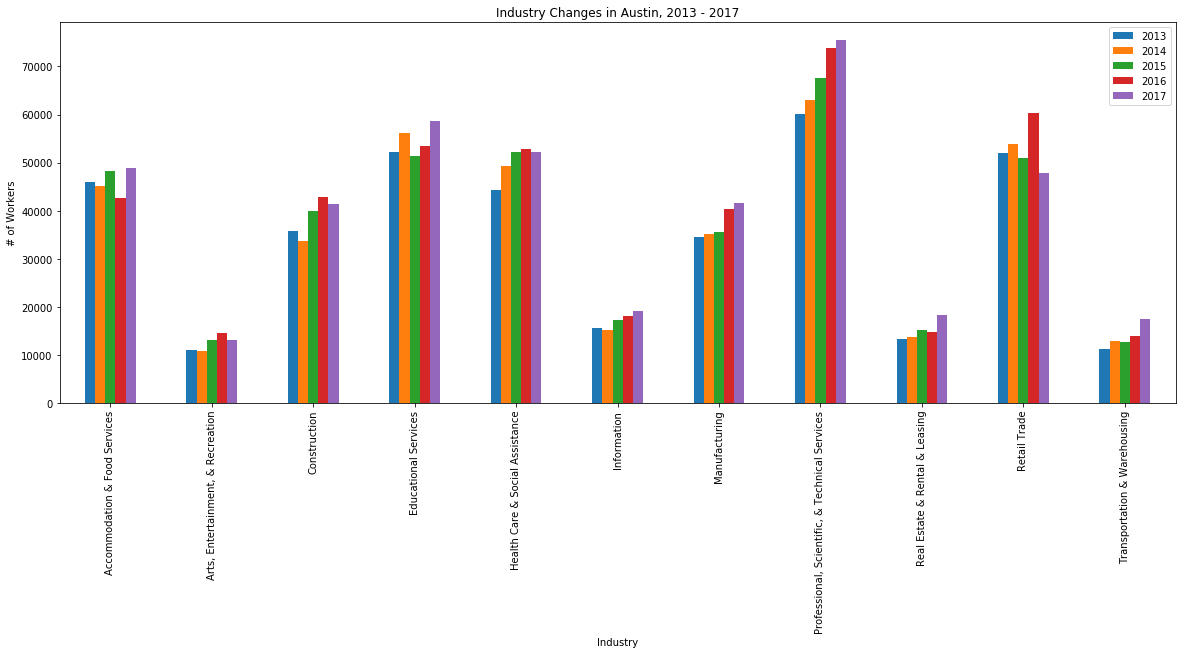

In [19]:
# plot industry data 
industry_groupings.plot.bar(legend=True, figsize = (20,7))
plt.xlabel("Industry")
plt.ylabel("# of Workers")
plt.title("Industry Changes in Austin, 2013 - 2017")
plt.savefig('images/industry_groupings.png',bbox_inches="tight")
plt.show()